# Исследование перемещения промышленного робота манипулятора

В рамках улучшения надежности и эффективности работы роботизированного оборудования, необходимо провести анализ данных, получаемых с робота манипулятора. Основная задача - обнаружить аномалии, которые могут указывать на проблемы в работе робота. Выявление таких отклонений могут помочь исправить возможные механические неисправности, сбои в электросистеме, а также улучшить диагностику состояния робота и обеспечить его более безопасную и эффективную эксплуатацию.

# Шаг 1.Изучение данных из файла

Импортируем необходимые библиотеки

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# устанавливаем отображение количества столбцов экране 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv('data_robot.csv')

Импортируем таблицу, выводим на экран несколько строк. Изучаем данные.

In [4]:
df.head(15)

,sep=,Unnamed: 1,sep=.1,Unnamed: 1.1,sep=.2,Unnamed: 1.2,sep=.3,Unnamed: 1.3,sep=.4,Unnamed: 1.4,sep=.5,Unnamed: 1.5,sep=.6,Unnamed: 1.6,sep=.7,Unnamed: 1.7,sep=.8,Unnamed: 1.8,sep=.9,Unnamed: 1.9,sep=.10,Unnamed: 1.10,sep=.11,Unnamed: 1.11,sep=.12,Unnamed: 1.12,sep=.13,Unnamed: 1.13,sep=.14,Unnamed: 1.14,sep=.15,Unnamed: 1.15,sep=.16,Unnamed: 1.16,sep=.17,Unnamed: 1.17,sep=.18,Unnamed: 1.18,sep=.19,Unnamed: 1.19,sep=.20,Unnamed: 1.20,sep=.21,Unnamed: 1.21,sep=.22,Unnamed: 1.22,sep=.23,Unnamed: 1.23,sep=.24,Unnamed: 1.24,sep=.25,Unnamed: 1.25,sep=.26,Unnamed: 1.26,sep=.27,Unnamed: 1.27,sep=.28,Unnamed: 1.28,sep=.29,Unnamed: 1.29,sep=.30,Unnamed: 1.30,sep=.31,Unnamed: 1.31,sep=.32,Unnamed: 1.32,sep=.33,Unnamed: 1.33,sep=.34,Unnamed: 1.34,sep=.35,Unnamed: 1.35,sep=.36,Unnamed: 1.36
0,Time,"{__name__=""tcp_coord"", axis=""x"", client_org_na...",Time,"{__name__=""tcp_coord"", axis=""y"", client_org_na...",Time,"{__name__=""tcp_coord"", axis=""z"", client_org_na...",Time,"{__name__=""joint_voltage"", client_org_name=""Te...",Time,"{__name__=""joint_voltage"", client_org_name=""Te...",Time,"{__name__=""joint_voltage"", client_org_name=""Te...",Time,"{__name__=""joint_voltage"", client_org_name=""Te...",Time,"{__name__=""joint_voltage"", client_org_name=""Te...",Time,"{__name__=""joint_voltage"", client_org_name=""Te...",Time,"{__name__=""tcp_ori"", axis=""x"", client_org_name...",Time,"{__name__=""tcp_ori"", axis=""y"", client_org_name...",Time,"{__name__=""tcp_ori"", axis=""z"", client_org_name...",Time,"{__name__=""joint_speed"", client_org_name=""Test...",Time,"{__name__=""joint_speed"", client_org_name=""Test...",Time,"{__name__=""joint_speed"", client_org_name=""Test...",Time,"{__name__=""joint_speed"", client_org_name=""Test...",Time,"{__name__=""joint_speed"", client_org_name=""Test...",Time,"{__name__=""joint_speed"", client_org_name=""Test...",Time,"{__name__=""tcp_travel_speed"", client_org_name=...",Time,"{__name__=""joint_temp"", client_org_name=""Test_...",Time,"{__name__=""joint_temp"", client_org_name=""Test_...",Time,"{__name__=""joint_temp"", client_org_name=""Test_...",Time,"{__name__=""joint_temp"", client_org_name=""Test_...",Time,"{__name__=""joint_temp"", client_org_name=""Test_...",Time,"{__name__=""joint_temp"", client_org_name=""Test_...",Time,"{__name__=""joint_current"", client_org_name=""Te...",Time,"{__name__=""joint_current"", client_org_name=""Te...",Time,"{__name__=""joint_current"", client_org_name=""Te...",Time,"{__name__=""joint_current"", client_org_name=""Te...",Time,"{__name__=""joint_current"", client_org_name=""Te...",Time,"{__name__=""joint_current"", client_org_name=""Te...",Time,"{__name__=""joint_angle"", client_org_name=""Test...",Time,"{__name__=""joint_angle"", client_org_name=""Test...",Time,"{__name__=""joint_angle"", client_org_name=""Test...",Time,"{__name__=""joint_angle"", client_org_name=""Test...",Time,"{__name__=""joint_angle"", client_org_name=""Test...",Time,"{__name__=""joint_angle"", client_org_name=""Test..."
1,2024-09-18 10:14:00,0,2024-09-18 10:14:00,0,2024-09-18 10:14:00,0,2024-09-18 10:14:00,0,2024-09-18 10:14:00,0,2024-09-18 10:14:00,0,2024-09-18 10:14:00,0,2024-09-18 10:14:00,0,2024-09-18 10:14:00,0,2024-09-18 10:14:00,0,2024-09-18 10:14:00,0,2024-09-18 10:14:00,0,2024-09-18 10:14:00,0,2024-09-18 10:14:00,0,2024-09-18 10:14:00,0,2024-09-18 10:14:00,0,2024-09-18 10:14:00,0,2024-09-18 10:14:00,0,2024-09-18 10:14:00,0,2024-09-18 10:14:00,0,2024-09-18 10:14:00,0,2024-09-18 10:14:00,0,2024-09-18 10:14:00,0,2024-09-18 10:14:00,0,2024-09-18 10:14:00,0,2024-09-18 10:14:00,0,2024-09-18 10:14:00,0,2024-09-18 10:14:00,0,2024-09-18 10:14:00,0,2024-09-18 10:14:00,0,2024-09-18 10:14:00,0,2024-09-18 10:14:00,0,2024-09-18 10:14:00,0,2024-09-18 10:14:00,0,2024-09-18 10:14:00,0,2024-09-18 10:14:00,0,2024-09-18 10:14:00,0
2,2024-09-18 10:14:15,0,2024-09-18 10:14:15,0,2024-09-18 10:14:15,0,2024-09-18 10:14:15,0,2024-09-18 10:14:15,0,2024-09-18 10:14:15,0,2024-09-18 10:14:15,0,2024-09-18

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1471 entries, 0 to 1470
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   sep=           1471 non-null   object
 1   Unnamed: 1     1471 non-null   object
 2   sep=.1         1471 non-null   object
 3   Unnamed: 1.1   1471 non-null   object
 4   sep=.2         1471 non-null   object
 5   Unnamed: 1.2   1471 non-null   object
 6   sep=.3         1471 non-null   object
 7   Unnamed: 1.3   1471 non-null   object
 8   sep=.4         1471 non-null   object
 9   Unnamed: 1.4   1471 non-null   object
 10  sep=.5         1471 non-null   object
 11  Unnamed: 1.5   1471 non-null   object
 12  sep=.6         1471 non-null   object
 13  Unnamed: 1.6   1471 non-null   object
 14  sep=.7         1471 non-null   object
 15  Unnamed: 1.7   1471 non-null   object
 16  sep=.8         1471 non-null   object
 17  Unnamed: 1.8   1471 non-null   object
 18  sep=.9         1471 non-null

In [6]:
df.shape

(1471, 74)

## Вывод

Таблица содержит 1741 строку и 74 столбца. Пропусков нет. Видим что столбцы имеют неверный тип данный. Нужно изменить тип, а также удалить дубликаты столбца time. Обратим внимание на название столбцов, каждый столбец нужно переименовать . Первые 11 строк имеют нулевые значения, возможно робот простаивал.

# Шаг 2. Предобработка данных

## Обработка дубликатов

Удалим дубликаты столбцов

In [7]:
# Находим столбцы, которые начинаются с "set=."
word_drop = 'sep=.'
columns_drop = [cl for cl in df.columns if cl.startswith(word_drop)]

In [8]:
 # Удаляем столбцы
df = df.drop(columns=columns_drop)

In [9]:
df.head(2)

,sep=,Unnamed: 1,Unnamed: 1.1,Unnamed: 1.2,Unnamed: 1.3,Unnamed: 1.4,Unnamed: 1.5,Unnamed: 1.6,Unnamed: 1.7,Unnamed: 1.8,Unnamed: 1.9,Unnamed: 1.10,Unnamed: 1.11,Unnamed: 1.12,Unnamed: 1.13,Unnamed: 1.14,Unnamed: 1.15,Unnamed: 1.16,Unnamed: 1.17,Unnamed: 1.18,Unnamed: 1.19,Unnamed: 1.20,Unnamed: 1.21,Unnamed: 1.22,Unnamed: 1.23,Unnamed: 1.24,Unnamed: 1.25,Unnamed: 1.26,Unnamed: 1.27,Unnamed: 1.28,Unnamed: 1.29,Unnamed: 1.30,Unnamed: 1.31,Unnamed: 1.32,Unnamed: 1.33,Unnamed: 1.34,Unnamed: 1.35,Unnamed: 1.36
0,Time,"{__name__=""tcp_coord"", axis=""x"", client_org_na...","{__name__=""tcp_coord"", axis=""y"", client_org_na...","{__name__=""tcp_coord"", axis=""z"", client_org_na...","{__name__=""joint_voltage"", client_org_name=""Te...","{__name__=""joint_voltage"", client_org_name=""Te...","{__name__=""joint_voltage"", client_org_name=""Te...","{__name__=""joint_voltage"", client_org_name=""Te...","{__name__=""joint_voltage"", client_org_name=""Te...","{__name__=""joint_voltage"", client_org_name=""Te...","{__name__=""tcp_ori"", axis=""x"", client_org_name...","{__name__=""tcp_ori"", axis=""y"", client_org_name...","{__name__=""tcp_ori"", axis=""z"", client_org_name...","{__name__=""joint_speed"", client_org_name=""Test...","{__name__=""joint_speed"", client_org_name=""Test...","{__name__=""joint_speed"", client_org_name=""Test...","{__name__=""joint_speed"", client_org_name=""Test...","{__name__=""joint_speed"", client_org_name=""Test...","{__name__=""joint_speed"", client_org_name=""Test...","{__name__=""tcp_travel_speed"", client_org_name=...","{__name__=""joint_temp"", client_org_name=""Test_...","{__name__=""joint_temp"", client_org_name=""Test_...","{__name__=""joint_temp"", client_org_name=""Test_...","{__name__=""joint_temp"", client_org_name=""Test_...","{__name__=""joint_temp"", client_org_name=""Test_...","{__name__=""joint_temp"", client_org_name=""Test_...","{__name__=""joint_current"", client_org_name=""Te...","{__name__=""joint_current"", client_org_name=""Te...","{__name__=""joint_current"", client_org_name=""Te...","{__name__=""joint_current"", client_org_name=""Te...","{__name__=""joint_current"", client_org_name=""Te...","{__name__=""joint_current"", client_org_name=""Te...","{__name__=""joint_angle"", client_org_name=""Test...","{__name__=""joint_angle"", client_org_name=""Test...","{__name__=""joint_angle"", client_org_name=""Test...","{__name__=""joint_angle"", client_org_name=""Test...","{__name__=""joint_angle"", client_org_name=""Test...","{__name__=""joint_angle"", client_org_name=""Test..."
1,2024-09-18 10:14:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
df.shape

(1471, 38)

Количество столбцов сократилось почти в 2 раза

In [11]:
#Удалим первые 11 строк, так как они не информативны
df = df.iloc[12:].reset_index(drop=True)

In [12]:
df.head(2)

,sep=,Unnamed: 1,Unnamed: 1.1,Unnamed: 1.2,Unnamed: 1.3,Unnamed: 1.4,Unnamed: 1.5,Unnamed: 1.6,Unnamed: 1.7,Unnamed: 1.8,Unnamed: 1.9,Unnamed: 1.10,Unnamed: 1.11,Unnamed: 1.12,Unnamed: 1.13,Unnamed: 1.14,Unnamed: 1.15,Unnamed: 1.16,Unnamed: 1.17,Unnamed: 1.18,Unnamed: 1.19,Unnamed: 1.20,Unnamed: 1.21,Unnamed: 1.22,Unnamed: 1.23,Unnamed: 1.24,Unnamed: 1.25,Unnamed: 1.26,Unnamed: 1.27,Unnamed: 1.28,Unnamed: 1.29,Unnamed: 1.30,Unnamed: 1.31,Unnamed: 1.32,Unnamed: 1.33,Unnamed: 1.34,Unnamed: 1.35,Unnamed: 1.36
0,2024-09-18 10:16:45,755,-96,397,47,47,48,48,48,48,-3137,1,1585,0,0,0,0,0,0,0,23,23,25,26,27,27,-146,5919,-3937,119,-46,-18,141,-182,1928,534,1571,127
1,2024-09-18 10:17:00,755,-96,397,47,47,48,48,48,48,-3137,1,1585,0,0,0,0,0,0,0,24,24,26,26,28,28,-160,5910,-3973,119,-46,-18,141,-182,1928,534,1571,127


## Переименование столбцов

In [13]:
# Переименование столбцов
df = df.rename(columns = {'sep=' : 'time', 'Unnamed: 1' : 'tcp_coord_x','Unnamed: 1.1' : 'tcp_coord_y','Unnamed: 1.2' : 'tcp_coord_z','Unnamed: 1.3' : 'joint1_voltage','Unnamed: 1.4' : 'joint2_voltage',
                        'Unnamed: 1.5' : 'joint3_voltage','Unnamed: 1.6' : 'joint4_voltage','Unnamed: 1.7' : 'joint5_voltage','Unnamed: 1.8' : 'joint6_voltage','Unnamed: 1.9' : 'tcp_ori_x','Unnamed: 1.10' : 'tcp_ori_y',
                       'Unnamed: 1.11' : 'tcp_ori_z','Unnamed: 1.12' : 'joint1_speed','Unnamed: 1.13' : 'joint2_speed','Unnamed: 1.14' : 'joint3_speed','Unnamed: 1.15' : 'joint4_speed',
                        'Unnamed: 1.16' : 'joint5_speed','Unnamed: 1.17' : 'joint6_speed','Unnamed: 1.18' : 'tcp_travel_speed','Unnamed: 1.19' : 'joint1_temperature','Unnamed: 1.20' : 'joint2_temperature', 'Unnamed: 1.21' : 'joint3_temperature',
                       'Unnamed: 1.22' : 'joint4_temperature','Unnamed: 1.23' : 'joint5_temperature','Unnamed: 1.24' : 'joint6_temperature','Unnamed: 1.25' : 'joint1_current', 'Unnamed: 1.26' : 'joint2_current',
                        'Unnamed: 1.27' : 'joint3_current','Unnamed: 1.28' : 'joint4_current','Unnamed: 1.29' : 'joint5_current','Unnamed: 1.30' : 'joint6_current','Unnamed: 1.31' : 'joint1_angle','Unnamed: 1.32': 'joint2_angle',
                       'Unnamed: 1.33' : 'joint3_angle','Unnamed: 1.34' : 'joint4_angle','Unnamed: 1.35' : 'joint5_angle','Unnamed: 1.36' : 'joint6_angle'})

In [14]:
df.head(2)

,time,tcp_coord_x,tcp_coord_y,tcp_coord_z,joint1_voltage,joint2_voltage,joint3_voltage,joint4_voltage,joint5_voltage,joint6_voltage,tcp_ori_x,tcp_ori_y,tcp_ori_z,joint1_speed,joint2_speed,joint3_speed,joint4_speed,joint5_speed,joint6_speed,tcp_travel_speed,joint1_temperature,joint2_temperature,joint3_temperature,joint4_temperature,joint5_temperature,joint6_temperature,joint1_current,joint2_current,joint3_current,joint4_current,joint5_current,joint6_current,joint1_angle,joint2_angle,joint3_angle,joint4_angle,joint5_angle,joint6_angle
0,2024-09-18 10:16:45,755,-96,397,47,47,48,48,48,48,-3137,1,1585,0,0,0,0,0,0,0,23,23,25,26,27,27,-146,5919,-3937,119,-46,-18,141,-182,1928,534,1571,127
1,2024-09-18 10:17:00,755,-96,397,47,47,48,48,48,48,-3137,1,1585,0,0,0,0,0,0,0,24,24,26,26,28,28,-160,5910,-3973,119,-46,-18,141,-182,1928,534,1571,127


 Описание данных:
 - time - время
 - tcp_coord_x - координата x TCP робота относительно базовой системы координат (мм)
 - tcp_coord_y - координата y TCP робота относительно базовой системы координат (мм)
 - tcp_coord_z - координата z TCP робота относительно базовой системы координат (мм)
 - joint1_voltage - напряжение привода первого сустава (В)
 - joint2_voltage - напряжение привода второго сустава (В)
 - joint3_voltage - напряжение привода третьего сустава (В)
 - joint4_voltage - напряжение привода четвертого сустава (В)
 - joint5_voltage - напряжение привода пятого сустава (В)
 - joint6_voltage - напрядение привода шестого сустава (В)
 - tcp_ori_x - ориентация tcp робота x
 - tcp_ori_y - ориентация tcp робота y
 - tcp_ori_z - ориентация tcp робота z
 - joint1_speed - скорость первого суствыв (°/с)
 - joint2_speed - скорость второго сустава (°/с)
 - joint3_speed - скорость третьего суства (°/с)
 - joint4_speed - скорость четвертого сустава (°/с)
 - joint5_speed - скорость пятого сустава (°/с)
 - joint6_speed - скорость шестого сустава (°/с)
 - tcp_travel_speed - скорость tcp
 - joint1_temperature - температура привода первого сустава (℃)
 - joint2_temperature - температура привода второго сустава (℃)
 - joint3_temperature - температура привода третьего сустава (℃)
 - joint4_temperature - температура привода четвертого сустава (℃)
 - joint5_temperature - температура привода пятого сустава (℃)
 - joint6_temperature - температура привода шестого сустава (℃)
 - joint1_current - ток привода первого сустава (А)
 - joint2_current - ток привода второго сустава (А)
 - joint3_current - ток привода третьего сустава (А)
 - joint4_current - ток привода четвертого сустава (А)
 - joint5_current - ток привода пятого сустава (А)
 - joint6_current - ток привода шестого сустава (А)
 - joint1_angle - угол поворота первого сустава
 - joint2_angle - угол поворота второго сустава
 - joint3_angle - угол поворота третьего сустава
 - joint4_angle - угол поворота четвертого сустава
 - joint5_angle - угол поворота пятого сустава
 - joint6_angle - угол поворота шестого сустава


## Замена типа данных

Самый простой способ преобразовать столбец данных в другой тип - использовать .astype()

In [15]:
# Выбираем числовые столбцы и меняем их тип на int
cl_convert = df.columns[1:] 
df_converted = df[cl_convert].astype(int)

In [16]:
# Объединяем преобразованные столбцы с остальными
df = pd.concat([df[df.columns[:1]], df_converted], axis=1)

In [17]:
df.dtypes

time                  object
tcp_coord_x            int32
tcp_coord_y            int32
tcp_coord_z            int32
joint1_voltage         int32
joint2_voltage         int32
joint3_voltage         int32
joint4_voltage         int32
joint5_voltage         int32
joint6_voltage         int32
tcp_ori_x              int32
tcp_ori_y              int32
tcp_ori_z              int32
joint1_speed           int32
joint2_speed           int32
joint3_speed           int32
joint4_speed           int32
joint5_speed           int32
joint6_speed           int32
tcp_travel_speed       int32
joint1_temperature     int32
joint2_temperature     int32
joint3_temperature     int32
joint4_temperature     int32
joint5_temperature     int32
joint6_temperature     int32
joint1_current         int32
joint2_current         int32
joint3_current         int32
joint4_current         int32
joint5_current         int32
joint6_current         int32
joint1_angle           int32
joint2_angle           int32
joint3_angle  

Переведем строковый столбец time в формат datetime

In [18]:
# Преобразование в формат datetime
df['time'] = pd.to_datetime(df['time'])

In [19]:
df['time'].dtypes

dtype('<M8[ns]')

Преобразуем дату и время в отдельные столбцы (год, месяц, день, час и т.д.) это позволит изучить данные в контексте разных временных интервалов.

In [20]:
# Извлекаем год, месяц, день, час, минуты и секунды
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month
df['day'] = df['time'].dt.day
df['hour'] = df['time'].dt.hour
df['minute'] = df['time'].dt.minute
df['second'] = df['time'].dt.second

Удалим столбец time, используя метод .drop(). После этого останутся только столбцы с извлечёнными компонентами даты и времени.

In [21]:
df = df.drop(columns = 'time')

In [22]:
df.head(2)

,tcp_coord_x,tcp_coord_y,tcp_coord_z,joint1_voltage,joint2_voltage,joint3_voltage,joint4_voltage,joint5_voltage,joint6_voltage,tcp_ori_x,tcp_ori_y,tcp_ori_z,joint1_speed,joint2_speed,joint3_speed,joint4_speed,joint5_speed,joint6_speed,tcp_travel_speed,joint1_temperature,joint2_temperature,joint3_temperature,joint4_temperature,joint5_temperature,joint6_temperature,joint1_current,joint2_current,joint3_current,joint4_current,joint5_current,joint6_current,joint1_angle,joint2_angle,joint3_angle,joint4_angle,joint5_angle,joint6_angle,year,month,day,hour,minute,second
0,755,-96,397,47,47,48,48,48,48,-3137,1,1585,0,0,0,0,0,0,0,23,23,25,26,27,27,-146,5919,-3937,119,-46,-18,141,-182,1928,534,1571,127,2024,9,18,10,16,45
1,755,-96,397,47,47,48,48,48,48,-3137,1,1585,0,0,0,0,0,0,0,24,24,26,26,28,28,-160,5910,-3973,119,-46,-18,141,-182,1928,534,1571,127,2024,9,18,10,17,0


## Вывод

После преобразований все столбцы имеют необходимый тип данных. Дубликаты столбцов были удалены. Таблица удобна для анализа данных - в каждом столбце таблицы хранятся значения, каждая строка содержит одно наблюдение, к которому привязаны значения разных переменных. Столбцы были переименованы, теперь они без пробелов, несколько слов разделяются нижним подчеркиванием, на одном языке и в одном регистре, отображают в краткой форме какого рода информация содержится в каждом столбце. Пропусков нет. В талице удалили первые 11 строк, так как они не иформативны, а также для исключения искажения результатов анализа. Разбив данные о дате на составляющие, можно исследовать, как разные переменные (например, температура, скорость, ток, напряжение) изменяются во времени.

# Шаг 3. Исследовательский анализ данных

Посмотрим на траекторию робота, основываясь на координаты TCP относительно базовой системы координат, для наглядного представления о его работе в реальных условиях.

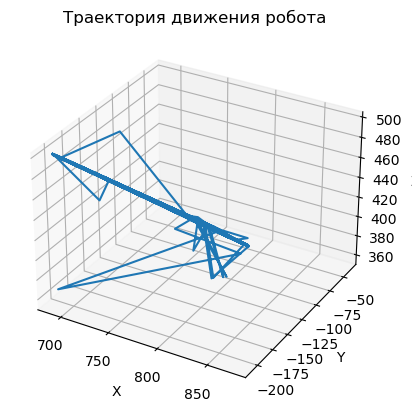

In [23]:
x = df['tcp_coord_x']
y = df['tcp_coord_y']
z = df['tcp_coord_z']

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Траектория движения робота')

plt.show()

Современные роботы, оснащённые множеством датчиков, они генерируют большие объёмы данных, которые могут быть использованы для диагностики, оценки производительности и улучшения алгоритмов управления. Основными параметрами, которые часто мониторятся, являются ток, скорость, температура, напряжение и другие характеристики, которые отражают состояние робота в процессе его работы.

Посмотрим взаимосвязь между основными переменными, такие как ток, угол поворота сустава, скорость и температура.

In [24]:
#Создадим таблицу с основными параметрами
corr_df = df[['joint1_speed','joint2_speed','joint3_speed', 'joint4_speed', 'joint5_speed', 'joint6_speed',
             'joint1_temperature','joint2_temperature','joint3_temperature', 'joint4_temperature','joint5_temperature', 'joint6_temperature',
              'joint1_current', 'joint2_current', 'joint3_current', 'joint4_current', 'joint5_current', 'joint6_current',
             'joint1_angle', 'joint2_angle','joint3_angle', 'joint4_angle', 'joint5_angle','joint6_angle']]

In [25]:
#Получим таблицу коэффициентов корреляции
corr_df.corr()

,joint1_speed,joint2_speed,joint3_speed,joint4_speed,joint5_speed,joint6_speed,joint1_temperature,joint2_temperature,joint3_temperature,joint4_temperature,joint5_temperature,joint6_temperature,joint1_current,joint2_current,joint3_current,joint4_current,joint5_current,joint6_current,joint1_angle,joint2_angle,joint3_angle,joint4_angle,joint5_angle,joint6_angle
joint1_speed,1.000000,-0.153358,0.564034,0.979376,0.295404,0.978254,0.001419,0.012833,-0.000355,0.000312,0.001356,-0.002721,0.586750,-0.313555,0.562053,0.492306,0.462040,0.581198,-0.041845,0.622039,0.379692,-0.093769,-0.011057,-0.060514
joint2_speed,-0.153358,1.000000,0.710371,-0.124050,-0.032249,-0.160689,-0.002323,0.003492,0.011565,0.009548,0.011541,0.012748,-0.233311,0.423740,0.297172,-0.045808,-0.210599,-0.231237,-0.456066,-0.025170,-0.344574,-0.454285,-0.362452,-0.460932
joint3_speed,0.564034,0.710371,1.000000,0.599778,0.186622,0.557602,-0.006363,0.005864,0.002219,0.001219,0.004293,0.002286,0.223145,0.124744,0.627936,0.301266,0.165101,0.222191,-0.357052,0.404223,0.010403,-0.389624,-0.257556,-0.373580
joint4_speed,0.979376,-0.124050,0.599778,1.000000,0.302197,0.981840,-0.008561,0.002432,-0.013409,-0.010671,-0.011128,-0.015255,0.579813,-0.298635,0.557828,0.482567,0.471448,0.576760,0.011223,0.601686,0.405407,-0.037445,0.047019,-0.006925
joint5_speed,0.295404,-0.032249,0.186622,0.302197,1.000000,0.298550,-0.017315,-0.021993,-0.024229,-0.022218,-0.013035,-0.020390,0.206670,-0.098879,0.202022,0.192291,0.142938,0.211890,0.039329,0.184660,0.151526,0.027700,0.027170,0.039349
joint6_speed,0.978254,-0.160689,0.557602,0.981840,0.298550,1.000000,0.000017,0.011629,0.001028,0.001522,0.002329,-0.000644,0.583566,-0.305356,0.555224,0.484244,0.467172,0.578252,-0.020044,0.615744,0.391332,-0.071190,0.012368,-0.038737
joint1_temperature,0.001419,-0.002323,-0.006363,-0.008561,-0.017315,0.000017,1.000000,0.967429,0.944552,0.945858,0.950509,0.949995,0.010115,-0.010442,-0.015307,-0.001119,-0.024517,0.011488,-0.007658,-0.010999,-0.018087,-0.012389,-0.007093,-0.006339
joint2_temperature,0.012833,0.003492,0.005864,0.002432,-0.021993,0.011629,0.967429,1.000000,0.939023,0.969792,0.949356,0.950818,0.002838,-0.002966,-0.014595,-0.007393,-0.028839,0.004421,-0.017503,-0.011484,-0.025953,-0.023202,-0.024018,-0.016196
joint3_temperature,-0.000355,0.011565,0.002219,-0.013409,-0.024229,0.001028,0.944552,0.939023,1.000000,0.957398,0.988574,0.990900,0.007767,-0.005157,-0.011082,0.000302,-0.001153,0.008024,-0.019338,-0.013088,-0.030915,-0.027236,-0.016200,-0.017757
joint4_temperature,0.000312,0.009548,0.001219,-0.010671,-0.022218,0.001522,0.945858,0.969792,0.957398,1.000000,0.967213,0.967331,0.002469,-0.005070,-0.015838,-0.005089,-0.013909,0.005015,-0.022898,-0.013534,-0.032225,-0.029774,-0.027672,-0.022723


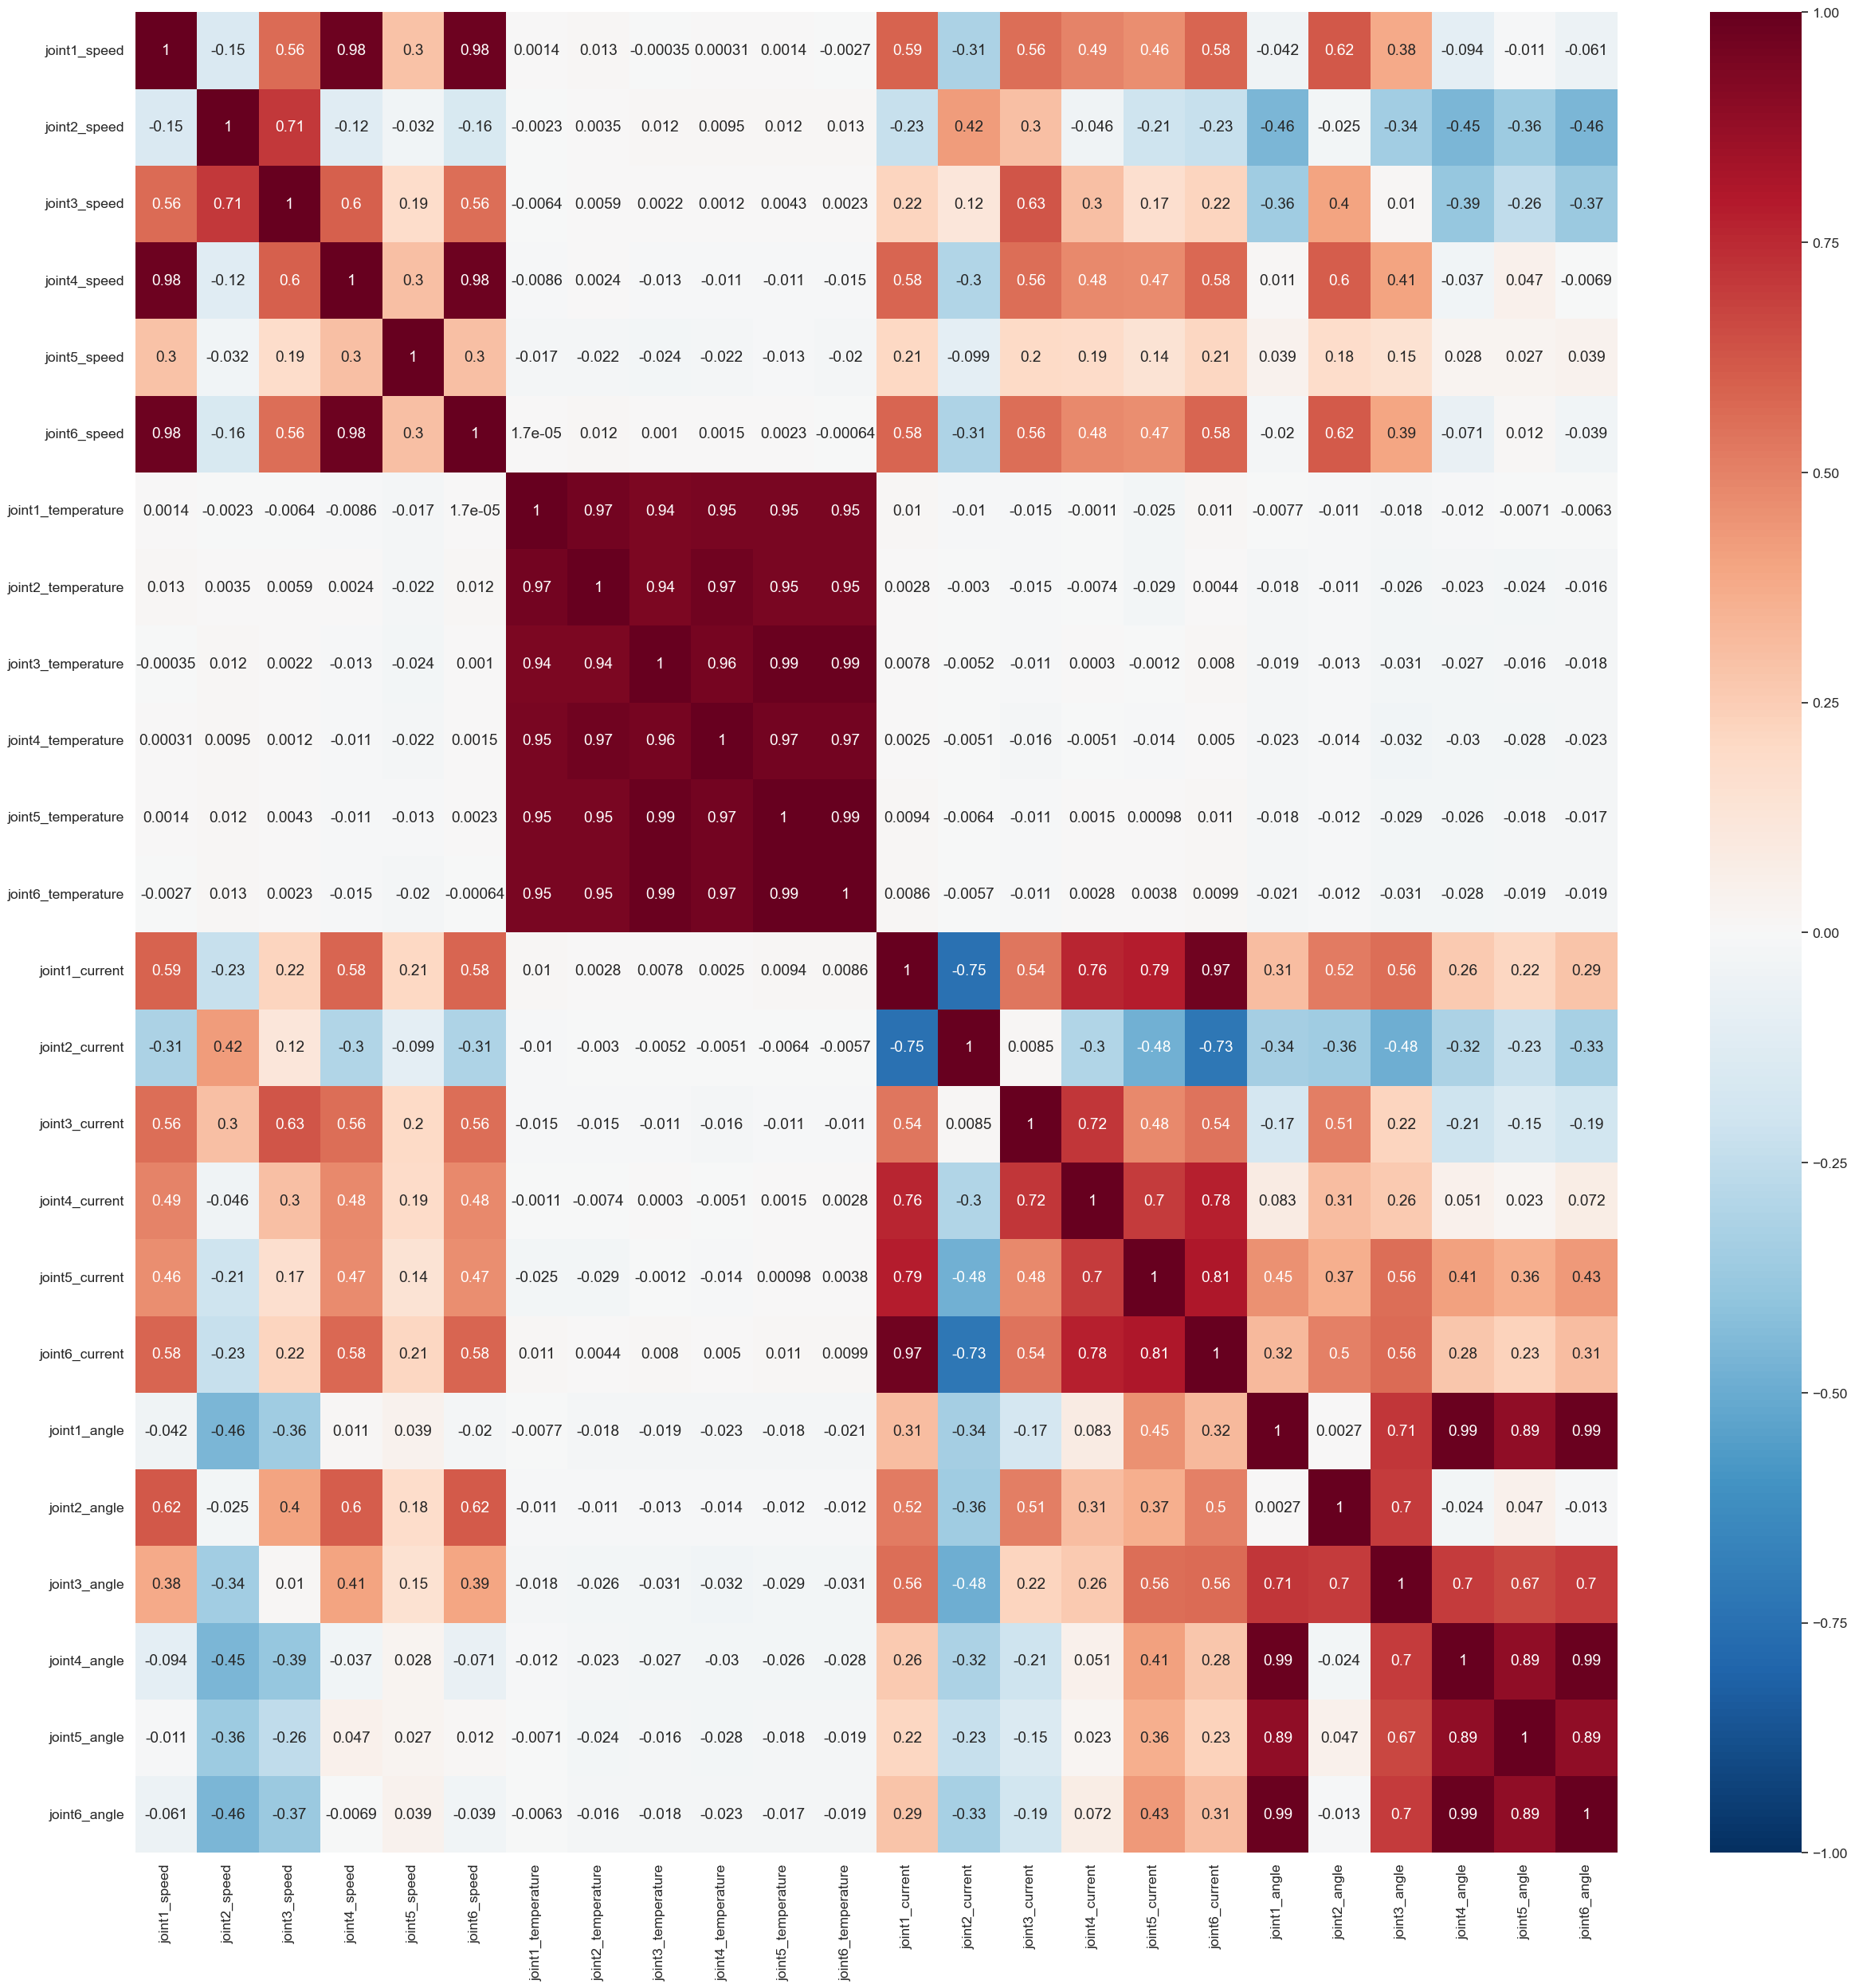

In [26]:
#Отрисуем тепловую карту
sns.set(font_scale=1.15)
plt.figure(figsize=(30,30))
sns.heatmap(
    corr_df.corr(),        
    cmap='RdBu_r', # задаёт цветовую схему
    annot=True, # рисует значения внутри ячеек
    vmin=-1, vmax=1); # указывает начало цветовых кодов от -1 до 1

Мы построили матрицу корреляции, по данным которой очевидно что у некоторых суставов есть умеренная положительная зависимость между током и скоростью. Предположим что при повышении скорости, растет и ток. 

Посмотрим на статистичсекие характеристики данных

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tcp_coord_x,1459.0,764.834133,51.545882,689.0,723.5,753.0,806.0,874.0
tcp_coord_y,1459.0,-144.375600,52.995821,-207.0,-197.0,-154.0,-97.0,-39.0
tcp_coord_z,1459.0,436.457848,42.921421,353.0,400.0,442.0,475.0,502.0
joint1_voltage,1459.0,47.000000,0.000000,47.0,47.0,47.0,47.0,47.0
joint2_voltage,1459.0,47.000000,0.000000,47.0,47.0,47.0,47.0,47.0
joint3_voltage,1459.0,47.938999,0.239414,47.0,48.0,48.0,48.0,48.0
joint4_voltage,1459.0,47.990404,0.097520,47.0,48.0,48.0,48.0,48.0
joint5_voltage,1459.0,47.994517,0.073871,47.0,48.0,48.0,48.0,48.0
joint6_voltage,1459.0,47.864976,0.341866,47.0,48.0,48.0,48.0,48.0
tcp_ori_x,1459.0,-3136.901302,0.298358,-3137.0,-3137.0,-3137.0,-3137.0,-3136.0


Основной момент, которые можно заметить, это стабильность работы робота, об этом нам говорит значение напряжения. Напряжение находится в диапазоне 47-48 В, что говорит о его постоянстве на протяжении долгого времени, это также может указывать на то, что робот работает в условиях, где нет перегрузок или других факторов, которые могли бы вызывать значительные изменения в параметре. Это может быть признаком того, что робот выполняет задачи, которые не приводят к критическим нагрузкам на его системы.

Еще одним подтверждением стабильности работы робота, также может служить температура. Каждый компонент робота  имеет свой диапазон температур. Если температура имеет нестабильность, постоянно растет это может быть признаком неисправности. Построим графики колебаний температуры, для большего понимания 'нормальной' температуры, возьмем медиану, так как она менее подвержена выбрасам.

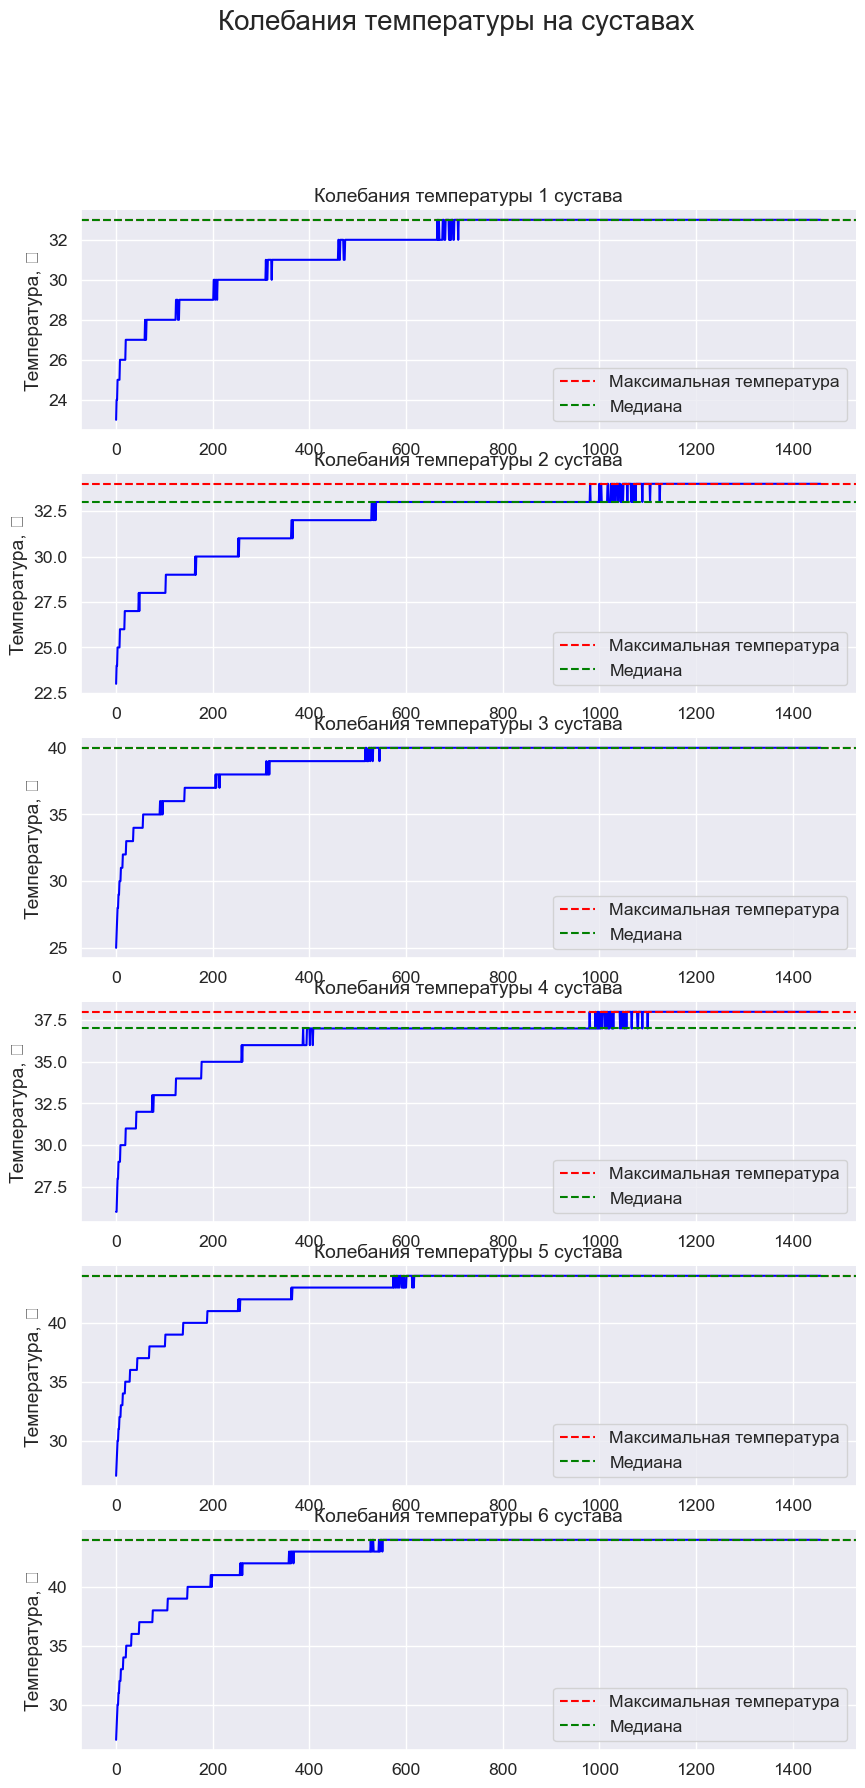

In [29]:
fig, ax = plt.subplots(6, 1, figsize=(10, 20))
fig.suptitle('Колебания температуры на суставах', fontsize=20)

# Список названий столбцов для каждого сустава
joint_columns = ['joint1_temperature', 'joint2_temperature', 'joint3_temperature', 
                 'joint4_temperature', 'joint5_temperature', 'joint6_temperature']

# Список названия суставов
joint_names = ['Колебания температуры 1 сустава', 'Колебания температуры 2 сустава', 'Колебания температуры 3 сустава', 
               'Колебания температуры 4 сустава', 'Колебания температуры 5 сустава', 'Колебания температуры 6 сустава']


# Построим графики
threshold = 2
for i, axis in enumerate(ax):
    joint_data = df[joint_columns[i]]  # Используем имя столбца из joint_columns
    
    # Вычисляем среднее, максимальную температуру и медиану
    max_temperature = joint_data.max()
    median_temperature = joint_data.median()
    

    # Строим график для каждого сустава
    axis.plot(joint_data, c='blue')
    
    # Добавляем горизонтальные линии для среднего значения

    axis.axhline(max_temperature, color='red', linestyle='--', label='Максимальная температура')
    axis.axhline(median_temperature, color='green', linestyle='--', label='Медиана')
    
    
    # Подписи осей
    axis.set_ylabel('Температура, ℃')
    
    # Добавляем заголовок для каждого графика
    axis.set_title(joint_names[i]) 
    
    # Добавление легенды
    axis.legend()

    # Отключаем верхнюю и правую рамки графика
    axis.spines['right'].set_visible(False)
    axis.spines['top'].set_visible(False)
    

plt.show();

Видим, что температура на всех 6 осях стабилизируется, это значит, что система охлаждения, будь то активное или пассивное охлаждение, справляется со своей задачей, не позволяя компонентам перегреваться. 2 и 4 сустав имеют небольшие скачки температуры, что может являться естественными колебаниями в работе робота. Иногда небольшие отклонения могут быть вызваны погрешностями датчиков или колебаниями, связанными с неточностью измерений.

В роботизированных системах важно отслеживать колебания тока и скорости, ведь именно эти параметры являются критичными для работы системы, и их колебания могут свидетельствовать о потенциальных неисправностях или износе механизма. Для визуализации динамики изменений тока и скорости построим линейные графики, которые помогут понять, как эти параметры изменяются во времени. Для обнаружений отклоненияй от нормального поведения воспользуемся статистическим методом μ±2σ.

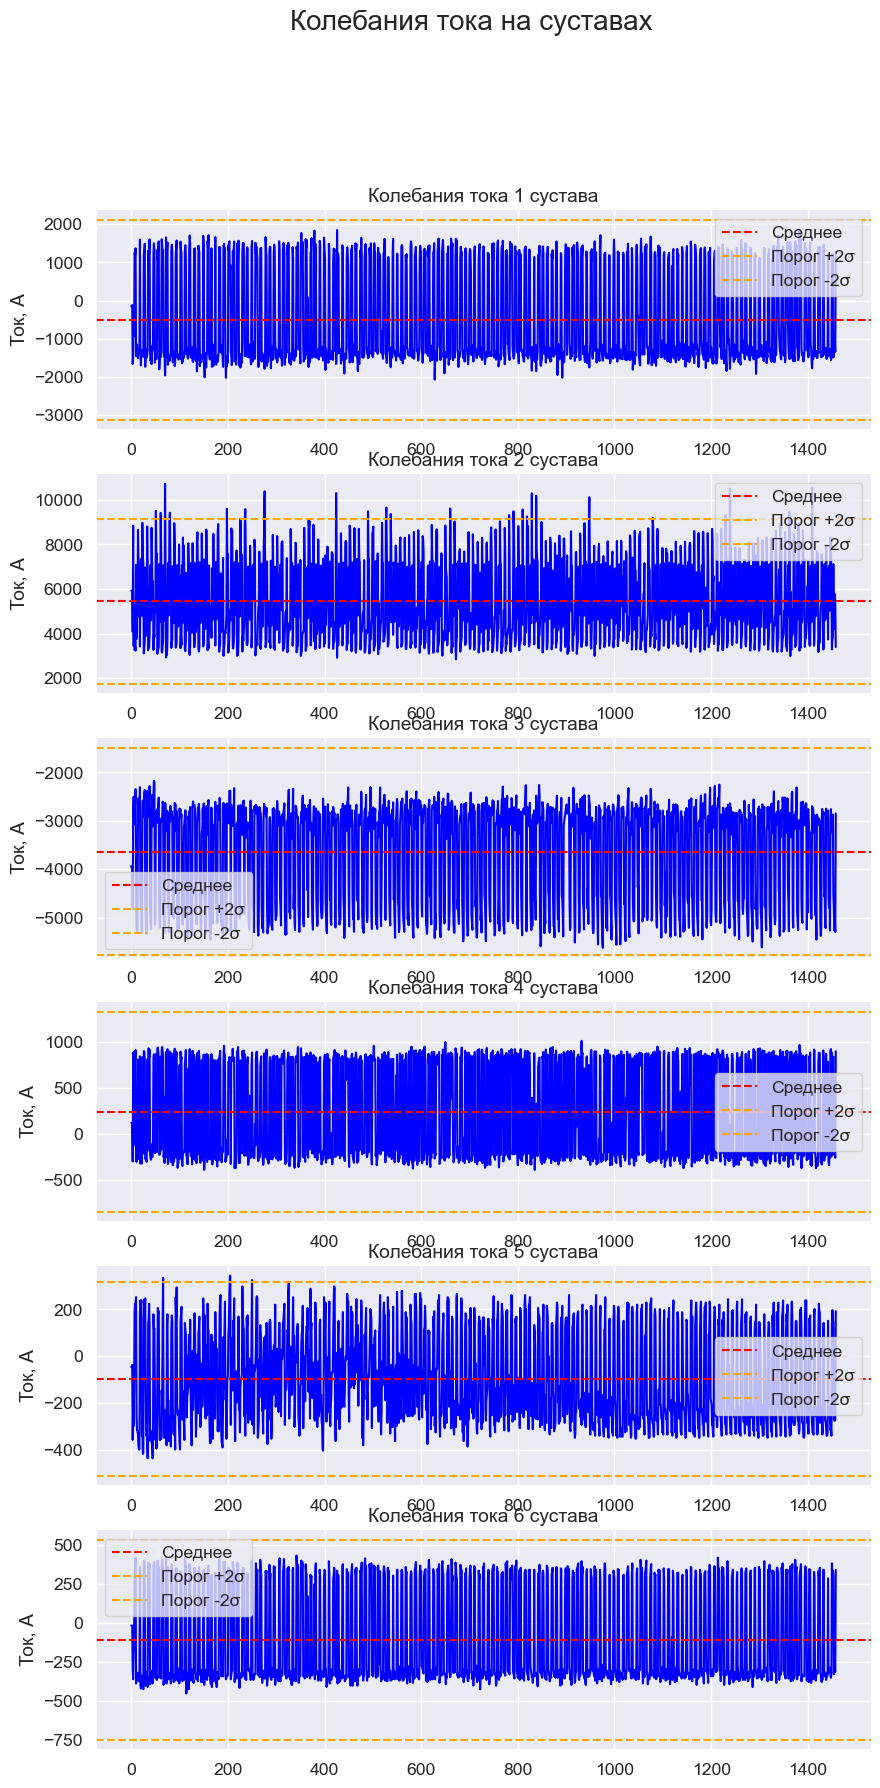

In [30]:
fig, ax = plt.subplots(6, 1, figsize=(10, 20))
fig.suptitle('Колебания тока на суставах', fontsize=20)

# Список названий столбцов для каждого сустава
joint_columns = ['joint1_current', 'joint2_current', 'joint3_current', 
                 'joint4_current', 'joint5_current', 'joint6_current']

# Список названия суставов
joint_names = ['Колебания тока 1 сустава', 'Колебания тока 2 сустава', 'Колебания тока 3 сустава', 
               'Колебания тока 4 сустава', 'Колебания тока 5 сустава', 'Колебания тока 6 сустава']


# Построим графики
threshold = 2
for i, axis in enumerate(ax):
    joint_data = df[joint_columns[i]]  # Используем имя столбца из joint_columns
    
    # Вычисляем среднее и стандартное отклонение
    mean = joint_data.mean()
    std = joint_data.std()

    # Ищем аномалии
    anomalies_1 = joint_data > mean + threshold * std
    anomalies_2 = joint_data < mean - threshold * std

    # Строим график для каждого сустава
    axis.plot(joint_data, c='blue')
    
    # Добавляем горизонтальные линии для среднего и пороговых значений
    axis.axhline(mean, color='red', linestyle='--', label='Среднее')
    axis.axhline(mean + threshold * std, color='orange', linestyle='--', label='Порог +2σ')
    axis.axhline(mean - threshold * std, color='orange', linestyle='--', label='Порог -2σ')

    # Подписи осей
    axis.set_ylabel('Ток, А')
    
    # Добавляем заголовок для каждого графика
    axis.set_title(joint_names[i]) 
    
    # Добавление легенды
    axis.legend()

    # Отключаем верхнюю и правую рамки графика
    axis.spines['right'].set_visible(False)
    axis.spines['top'].set_visible(False)
    

  

plt.show()

Из графиков видим, что 2 и 5 сустав имеют аномальные колебания. Суставы 1, 3, 4, 6 имеют стабильные колебания, что может говорить о исправности систем, а также о отсутствии перегрузки.

Аномалии могут быть связаны с нормальными операциями, такими как изменение нагрузки или запуск системы, их можно считать нормальными. В таких случаях можно просто скорректировать систему для предотвращения частых или слишком крупных колебаний. Но также выбросы могут происходить без видимых причин, что означает перегрузку, неисправность или ошибки колибровки.

Чтобы сделать вывод о выбросах, нужно посмотреть на колебания скорости. Так как скорость и ток имеют умеренную положительную зависимость.

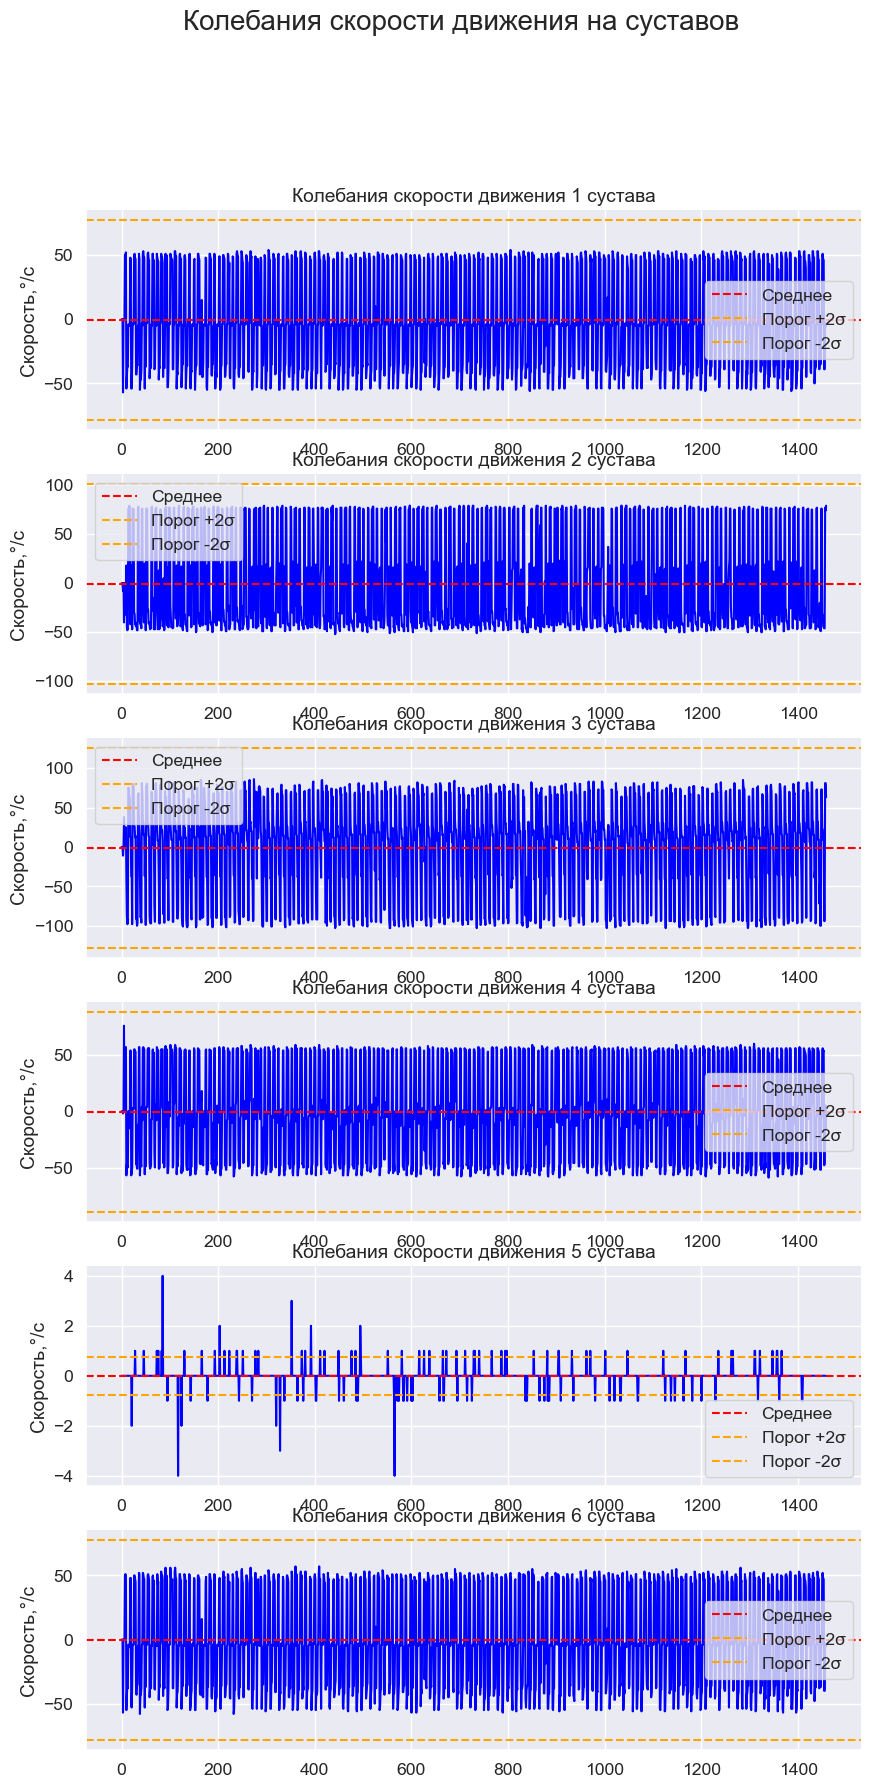

In [31]:
fig, ax = plt.subplots(6, 1, figsize=(10, 20))
fig.suptitle('Колебания скорости движения на суставов', fontsize=20)

# Список названий столбцов для каждого сустава
joint_columns = ['joint1_speed', 'joint2_speed', 'joint3_speed', 
                 'joint4_speed', 'joint5_speed', 'joint6_speed']

# Список названия суставов
joint_names = ['Колебания скорости движения 1 сустава', 'Колебания скорости движения 2 сустава', 'Колебания скорости движения 3 сустава', 
               'Колебания скорости движения 4 сустава', 'Колебания скорости движения 5 сустава', 'Колебания скорости движения 6 сустава']


# Построим графики
threshold = 2
for i, axis in enumerate(ax):
    joint_data = df[joint_columns[i]]  # Используем имя столбца из joint_columns
    
    # Вычисляем среднее и стандартное отклонение
    mean = joint_data.mean()
    std = joint_data.std()

    # Ищем аномалии
    anomalies_1 = joint_data > mean + threshold * std
    anomalies_2 = joint_data < mean - threshold * std

    # Строим график для каждого сустава
    axis.plot(joint_data, c='blue')
    
    # Добавляем горизонтальные линии для среднего и пороговых значений
    axis.axhline(mean, color='red', linestyle='--', label='Среднее')
    axis.axhline(mean + threshold * std, color='orange', linestyle='--', label='Порог +2σ')
    axis.axhline(mean - threshold * std, color='orange', linestyle='--', label='Порог -2σ')

    # Подписи осей
    axis.set_ylabel('Скорость,°/с')
    
    # Добавляем заголовок для каждого графика
    axis.set_title(joint_names[i]) 
    
    # Добавление легенды
    axis.legend()

    # Отключаем верхнюю и правую рамки графика
    axis.spines['right'].set_visible(False)
    axis.spines['top'].set_visible(False)
     

plt.show()

Посмотрев на основные параметры можно сказать, что аномальные колебания на 2 суставе не является нормальными, так как колебания скорости имеют стабильную динамику. Делаем вывод о нескольких причинах возникновения выбросов. Возможно, что контроллер, который регулирует движение сустава, некорректно управляет подачей тока на мотор, что вызывает пиковые значения тока, но не влияет на сам процесс движения. Это может быть связано с неправильной калибровкой датчиков. Также есть вероятность в механическом  износе (например, износ подшипников или других деталей), что требует большего тока для поддержания того же движения. Однако, если система управления компенсирует это изменение, скорость может оставаться стабильной, несмотря на изменения в потребляемом токе.

На 5 суставе наблюдаются аномальные значения скорости, можно предположить что эти выбросы обусловленным механическими особенностями сустава, его высокой инерцией (при изменении условий работы (например, при старте или остановке сустава) могут возникать переходные процессы, где угловая скорость меняется нестабильно, что может привести к кратковременным выбросам) и возможными колебаниями в передаче усилий. 

## Вывод

Нам предоставлены данные о шестиосевом роботе манипуляторе от робототехнической компании. Основная задача - обнаружить аномалии, которые могут указывать на проблемы в работе робота. Выявление отклонений позволит улучшить диагностику состояния робота и обеспечить его более безопасную и эффективную эксплуатацию. Для этого была проведена предоработка данных. Были определены дубликаты столбца time, которые в дальнейшем удалили. Так же изменили типы данных столбцов необходимых нам в расчетах. Переименовали столбцы, теперь они отображают в краткой форме какого рода информация содержится в каждом столбце. В ходе дальнейшего анализа, постарались определить корреляцию между основными параметрами - ток, угловая скорость, угол поворота суставов, температура. Есть умеренная положительная зависимость между током и скоростью на некоторых суставах. Это может говорить о том, что при повышении скорости, растет и ток. В анализе не участвовали данные о tcp (инструмент робота), потому что инструмент робота не связаны напрямую с состоянием или производительностью робота в контексте анализа его работы. Анализ показал, что робот работал стабильно, так как значения напряжения и температуры не имеют выбросов, это может говорить об отсутствии какой либо большой нагрузки или внешнего воздействия. Построили линейные графики тока и скорости, для того чтобы определить есть ли аномалии в работе суставов. В основном аномалии были выявлены во 2 суставе, рекомендуется изучить, как система реагирует на изменения в нагрузке и как контролируется подача тока. Также возможна механическая диагностика, оценка возможного износа или повреждений частей сустава (например, подшипников, валов и пр.) 
